<a href="https://colab.research.google.com/github/Tharanidissanayake/Machine-Learning/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [61]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', header=None)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4601 non-null   float64
 1   1       4601 non-null   float64
 2   2       4601 non-null   float64
 3   3       4601 non-null   float64
 4   4       4601 non-null   float64
 5   5       4601 non-null   float64
 6   6       4601 non-null   float64
 7   7       4601 non-null   float64
 8   8       4601 non-null   float64
 9   9       4601 non-null   float64
 10  10      4601 non-null   float64
 11  11      4601 non-null   float64
 12  12      4601 non-null   float64
 13  13      4601 non-null   float64
 14  14      4601 non-null   float64
 15  15      4601 non-null   float64
 16  16      4601 non-null   float64
 17  17      4601 non-null   float64
 18  18      4601 non-null   float64
 19  19      4601 non-null   float64
 20  20      4601 non-null   float64
 21  21      4601 non-null   float64
 22  

In [63]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [64]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


# Load the names from names folder

In [65]:
url_names = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names'
names = pd.read_csv(url_names, skiprows=31, header=None, sep=':', names=['feature_name', 'description'])

# Extract the names of the columns
column_names = list(names['feature_name'])

# Add the column names to the data
data.columns = column_names

# View the combined data and names
print(data.head())

   1, 0.    | spam, non-spam classes  word_freq_make  word_freq_address  \
0                               0.00            0.64               0.64   
1                               0.21            0.28               0.50   
2                               0.06            0.00               0.71   
3                               0.00            0.00               0.00   
4                               0.00            0.00               0.00   

   word_freq_all  word_freq_3d  word_freq_our  word_freq_over  \
0            0.0          0.32           0.00            0.00   
1            0.0          0.14           0.28            0.21   
2            0.0          1.23           0.19            0.19   
3            0.0          0.63           0.00            0.31   
4            0.0          0.63           0.00            0.31   

   word_freq_remove  word_freq_internet  word_freq_order  ...  \
0              0.00                0.00             0.00  ...   
1              0.07         

# Shuffle the Dataset

In [66]:
data = data.sample(frac=1, random_state=42)

# Split the Data into Training and Testing Sets

In [67]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the Data

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Check for Missing Values

In [69]:
print(data.isnull().sum())

1, 0.    | spam, non-spam classes    0
word_freq_make                       0
word_freq_address                    0
word_freq_all                        0
word_freq_3d                         0
word_freq_our                        0
word_freq_over                       0
word_freq_remove                     0
word_freq_internet                   0
word_freq_order                      0
word_freq_mail                       0
word_freq_receive                    0
word_freq_will                       0
word_freq_people                     0
word_freq_report                     0
word_freq_addresses                  0
word_freq_free                       0
word_freq_business                   0
word_freq_email                      0
word_freq_you                        0
word_freq_credit                     0
word_freq_your                       0
word_freq_font                       0
word_freq_000                        0
word_freq_money                      0
word_freq_hp             

# Feature Engineering

In [70]:
data['email_length'] = data.iloc[:, :-1].sum(axis=1)


# Train the KNN Model

In [71]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

# Predict the test set labels

In [72]:
y_pred_knn = knn.predict(X_test)

# Evaluate the Performance of the KNN model

In [73]:
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

print("KNN Model Performance:")
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 Score: {:.3f}".format(f1))

KNN Model Performance:
Accuracy: 0.912
Precision: 0.914
Recall: 0.865
F1 Score: 0.889


# Create confusion matrix for KNN model


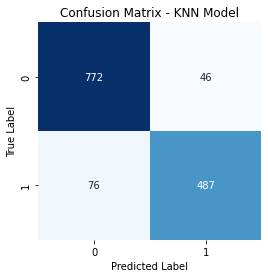

In [76]:
knn_cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(4,4))
sns.heatmap(knn_cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix - KNN Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Train the Decision Tree model

In [56]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Predict the test set labels

In [57]:
y_pred_dt = dt.predict(X_test)

# Evaluate the Performance of the Decision Tree model

In [58]:
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

print("Decision Tree Model Performance:")
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 Score: {:.3f}".format(f1))

Decision Tree Model Performance:
Accuracy: 0.912
Precision: 0.896
Recall: 0.888
F1 Score: 0.892


# Create confusion matrix for Decision Tree model

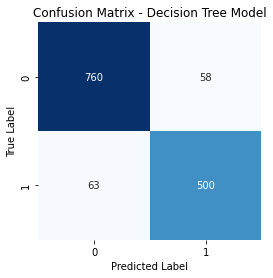

In [77]:
dt_cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(4,4))
sns.heatmap(dt_cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix - Decision Tree Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()